In [55]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [3]:
# Import data
file_path = "../Project2/data/online_gaming_behavior_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [4]:
# Get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

Looking at the content of the data frame DF, we see that we have a combination of numeric and string columns.

In [5]:
# check for NA's
df.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [6]:
# assign y to EngangementLevel
y = df['EngagementLevel']
df = df.drop(columns=['EngagementLevel','PlayerID'])
df.head()


,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37


In [76]:
df_lm = pd.DataFrame(columns=df.columns)
new_row = {
'Age'
: 57,
 'GameGenre'
: 'Action',
'PlayTimeHours'
: 1.5,
'InGamePurchases'
: 0,
'GameDifficulty'
: 'Medium',
'SessionsPerWeek'
: 2,
'AvgSessionDurationMinutes'
:30,
'PlayerLevel'
:10,
'AchievementsUnlocked'
:8,
'Gender_Male'
: 1,
'Location_Europe'
: 0,
'Location_Other'
: 0,
'Location_USA'
: 1,
'GameGenre_RPG'
: 0,
'GameGenre_Simulation'
: 0,
'GameGenre_Sports'
: 0,
'GameGenre_Strategy',
: 0,
'GameDifficulty_Hard',
'GameDifficulty_Medium'

}

new_row2 = {
'Age'
: 49,
'Gender'
: 'Male',
'Location'
: 'USA',
 'GameGenre'
: 'RPG',
'PlayTimeHours'
: 6,
'InGamePurchases'
: 0,
'GameDifficulty'
: 'Medium',
'SessionsPerWeek'
: 5,
'AvgSessionDurationMinutes'
:180,
'PlayerLevel'
:20,
'AchievementsUnlocked'
:50}

df_lm.loc[len(df_lm)] = new_row
df_lm.loc[len(df_lm)] = new_row2

df_lm


,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,57,Male,USA,Action,1.5,0,Medium,2,30,10,8
1,49,Male,USA,RPG,6.0,0,Medium,5,180,20,50


In [81]:
X.columns

Index(['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'Gender_Male', 'Location_Europe', 'Location_Other', 'Location_USA',
       'GameGenre_RPG', 'GameGenre_Simulation', 'GameGenre_Sports',
       'GameGenre_Strategy', 'GameDifficulty_Hard', 'GameDifficulty_Medium'],
      dtype='object')

In [7]:
df['InGamePurchases'].unique()

array([0, 1], dtype=int64)

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 2, 0, ..., 0, 2, 2])

In [9]:
# list classes
le.classes_

array(['High', 'Low', 'Medium'], dtype=object)

In [10]:
# lookup classes by number
le.inverse_transform([0])

array(['High'], dtype=object)

In [11]:
# look at unique values in object columns
obj_col = []
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"unique {col}: {df[col].unique()}")
        obj_col.append(col)

unique Gender: ['Male' 'Female']
unique Location: ['Other' 'USA' 'Europe' 'Asia']
unique GameGenre: ['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']
unique GameDifficulty: ['Medium' 'Easy' 'Hard']


In [12]:

# encoded columns with objects to numeric values, get_dummies
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded,columns= obj_col,dtype='int',drop_first=True)
X = df_encoded
X

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Hard,GameDifficulty_Medium
0,43,16.271119,0,6,108,79,25,1,0,1,0,0,0,0,1,0,1
1,29,5.525961,0,5,144,11,10,0,0,0,1,0,0,0,1,0,1
2,22,8.223755,0,16,142,35,41,0,0,0,1,0,0,1,0,0,0
3,35,5.265351,1,9,85,57,47,1,0,0,1,0,0,0,0,0,0
4,33,15.531945,0,2,131,95,37,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,20.619662,0,4,75,85,14,1,0,0,1,0,0,0,1,0,0
40030,44,13.539280,0,19,114,71,27,0,0,1,0,0,1,0,0,1,0
40031,15,0.240057,1,10,176,29,1,0,0,0,1,1,0,0,0,0,0
40032,34,14.017818,1,3,128,70,10,1,0,0,1,0,0,1,0,0,1


In [13]:

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   PlayTimeHours              40034 non-null  float64
 2   InGamePurchases            40034 non-null  int64  
 3   SessionsPerWeek            40034 non-null  int64  
 4   AvgSessionDurationMinutes  40034 non-null  int64  
 5   PlayerLevel                40034 non-null  int64  
 6   AchievementsUnlocked       40034 non-null  int64  
 7   Gender_Male                40034 non-null  int32  
 8   Location_Europe            40034 non-null  int32  
 9   Location_Other             40034 non-null  int32  
 10  Location_USA               40034 non-null  int32  
 11  GameGenre_RPG              40034 non-null  int32  
 12  GameGenre_Simulation       40034 non-null  int32  
 13  GameGenre_Sports           40034 non-null  int

In [14]:

# Split the data into training and testing sets using random_state=365
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=365)

In [15]:
# Scale columns for X_train and X_test
scale_col = ['Age','PlayTimeHours','SessionsPerWeek','AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked']
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.49680109, -0.78441908, -0.50088452, ..., -0.50239271,
         2.        , -0.65493921],
       [-0.99512579,  1.63174671, -0.50088452, ...,  1.99047476,
        -0.5       , -0.65493921],
       [ 0.69917818,  1.16638518, -0.50088452, ..., -0.50239271,
        -0.5       ,  1.52685927],
       ...,
       [-0.69613097, -1.05925066, -0.50088452, ..., -0.50239271,
        -0.5       , -0.65493921],
       [ 1.69582757,  1.35944018, -0.50088452, ..., -0.50239271,
        -0.5       , -0.65493921],
       [-0.39713615, -1.35445716, -0.50088452, ..., -0.50239271,
        -0.5       ,  1.52685927]])

In [16]:
# # linear regression model
# lr = LogisticRegression()
# lr.fit(X_train_scaled,y_train)
# #predicted_y = lr.predict(X_test_scaled)

In [17]:
# # Validate the model by checking the model accuracy with model.score
# print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")

In [18]:
# score = round(lr.score(X_train, y_train, sample_weight=None),5) 
# r2 = round(r2_score(y_test, predicted_y),5)
# #mse = round(mean_squared_error(y_test, predicted_y),4)
# #rmse = round(np.sqrt(mse),4)
# score
# r2

k: 1, Train/Test Score: 1.000/0.641
k: 3, Train/Test Score: 0.838/0.669
k: 5, Train/Test Score: 0.805/0.683
k: 7, Train/Test Score: 0.794/0.698
k: 9, Train/Test Score: 0.787/0.712
k: 11, Train/Test Score: 0.779/0.715
k: 13, Train/Test Score: 0.775/0.724
k: 15, Train/Test Score: 0.771/0.726
k: 17, Train/Test Score: 0.769/0.729
k: 19, Train/Test Score: 0.766/0.727
k: 21, Train/Test Score: 0.766/0.729
k: 23, Train/Test Score: 0.762/0.730
k: 25, Train/Test Score: 0.759/0.731
k: 27, Train/Test Score: 0.758/0.732
k: 29, Train/Test Score: 0.755/0.732
k: 31, Train/Test Score: 0.753/0.729
k: 33, Train/Test Score: 0.752/0.729
k: 35, Train/Test Score: 0.750/0.730
k: 37, Train/Test Score: 0.747/0.729
k: 39, Train/Test Score: 0.745/0.729


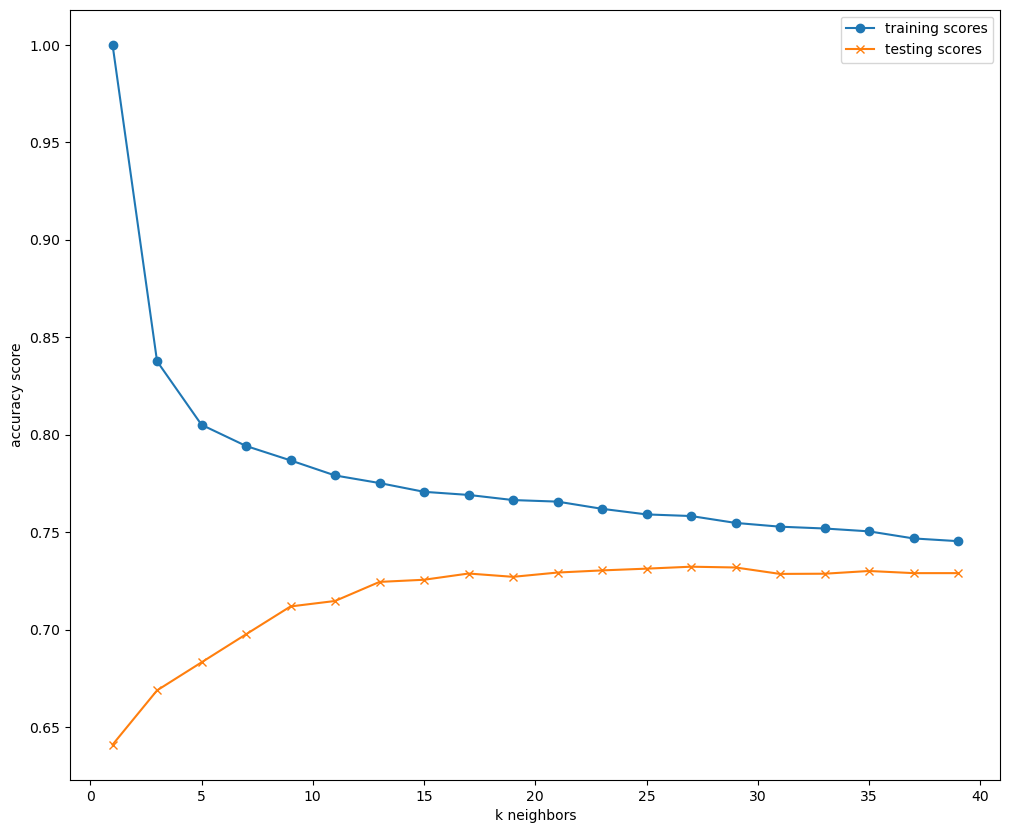

In [19]:

# Loop through different k values to find which has the highest accuracy.

train_scores = []
test_scores = []

for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.figure(figsize=(12,10))
plt.plot(range(1, 40, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 40, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [56]:
#setup models

knn_model = KNeighborsClassifier(n_neighbors=27)
lr_model = LogisticRegression(random_state=1)
svm_model = SVC(kernel='linear')
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=128, random_state=1,max_depth=11,criterion='entropy')
gb_model = GradientBoostingClassifier(random_state=1,max_depth=3,n_estimators=128)
ab_model = AdaBoostClassifier(random_state=1)

#XGBOOST and LIGHT GBM

In [57]:
df_scores = pd.DataFrame()
# Assuming you have a list of labels
labels = ['train_acc', 'test_acc', 'diff', 'r2', "mse", 'rmse']  # Replace these with your actual labels
df_scores['Description'] = labels
df_scores.set_index('Description', inplace=True)
 
def validate_model(model, X_train, y_train, X_test, y_test):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    y_predict = model.predict(X_test)
    r2 = round(r2_score(y_test,y_predict),5)
    mse = round(mean_squared_error(y_test, y_predict),4)
    rmse = round(np.sqrt(mse),4)
    return train_accuracy, test_accuracy, r2, mse, rmse
 
def collectResults( model_label, train_acc, test_acc, r2, mse, rmse):
    df_scores[model_label] = [train_acc, test_acc, abs(test_acc-train_acc),r2, mse, rmse]
     
def train_model(model, model_id):
    model.fit(X_train_scaled,y_train)
    train_acc, test_acc, r2_acc, mse, rmse= validate_model (model,X_train_scaled, y_train, X_test_scaled, y_test)
    collectResults(model_id,train_acc,test_acc,r2_acc, mse, rmse)
    return model

In [61]:
knn_model = train_model(knn_model,"knn")
lr_model = train_model(lr_model, "lr")
svm_model = train_model(svm_model,"svm")
dt_model = train_model(lr_model, "dt")
rf_model = train_model(rf_model, "rf")
gb_model = train_model(gb_model, "gb")
ab_model = train_model(ab_model, "ab")
df_scores

c:\Users\saund\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,rf,gb,knn,lr,svm,dt,ab
Description,,,,,,,
train_acc,0.927061,0.916503,0.758235,0.824979,0.826311,0.824979,0.809359
test_acc,0.901389,0.904886,0.732241,0.820961,0.818763,0.820961,0.805375
diff,0.025672,0.011617,0.025994,0.004018,0.007548,0.004018,0.003984
r2,0.677970,0.693450,0.164830,0.495980,0.491490,0.495980,0.392250
mse,0.222400,0.211700,0.576800,0.348100,0.351200,0.348100,0.419700
rmse,0.471600,0.460100,0.759500,0.590000,0.592600,0.590000,0.647800


In [36]:
gb_model = train_model(gb_model, "gb")
print (df_scores)  

                  knn        lr       svm        dt        rf        gb
Description                                                            
train_acc    0.758235  0.824979  0.826311  0.824979  0.927061  0.914105
test_acc     0.732241  0.820961  0.818763  0.820961  0.901389  0.903187
diff         0.025994  0.004018  0.007548  0.004018  0.025672  0.010918
r2           0.164830  0.495980  0.491490  0.495980  0.677970  0.688820


In [37]:
ab_model = train_model(ab_model, "ab")
print (df_scores)  

c:\Users\saund\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                  knn        lr       svm        dt        rf        gb  \
Description                                                               
train_acc    0.758235  0.824979  0.826311  0.824979  0.927061  0.914105   
test_acc     0.732241  0.820961  0.818763  0.820961  0.901389  0.903187   
diff         0.025994  0.004018  0.007548  0.004018  0.025672  0.010918   
r2           0.164830  0.495980  0.491490  0.495980  0.677970  0.688820   

                   ab  
Description            
train_acc    0.809359  
test_acc     0.805375  
diff         0.003984  
r2           0.392250  


In [22]:
# knn model
knn_model.fit(X_train_scaled,y_train)
train_acc, test_acc, r2_acc = validate_model (knn_model,X_train_scaled, y_train, X_test_scaled, y_test)
collectResults("KNN",train_acc,test_acc,r2_acc)

        KNN
0  0.758235
1  0.732241
2  0.025994
3  0.164830


In [23]:

# Logistic regression
lr_model.fit(X_train_scaled, y_train)
train_acc, test_acc, r2_acc, = validate_model (lr_model,X_train_scaled, y_train, X_test_scaled, y_test)
collectResults("LR",train_acc,test_acc, r2_acc)

        KNN        LR
0  0.758235  0.824979
1  0.732241  0.820961
2  0.025994  0.004018
3  0.164830  0.495980


0: High
1: Medium
2: Low

In [24]:
# SVM model
svm_model.fit(X_train_scaled, y_train)
train_acc, test_acc, r2_acc, = validate_model (svm_model,X_train_scaled, y_train, X_test_scaled, y_test)
collectResults("SVM",train_acc,test_acc, r2_acc)

        KNN        LR       SVM
0  0.758235  0.824979  0.826311
1  0.732241  0.820961  0.818763
2  0.025994  0.004018  0.007548
3  0.164830  0.495980  0.491490


In [25]:
# decition tree model 
dt_model.fit(X_train_scaled, y_train)
train_acc, test_acc, r2_acc, = validate_model (dt_model,X_train_scaled, y_train, X_test_scaled, y_test)
collectResults("dt",train_acc,test_acc, r2_acc)

        KNN        LR       SVM        dt
0  0.758235  0.824979  0.826311  1.000000
1  0.732241  0.820961  0.818763  0.828055
2  0.025994  0.004018  0.007548  0.171945
3  0.164830  0.495980  0.491490  0.460680


In [26]:
# Random Forest
rf_model.fit(X_train_scaled, y_train)
train_acc, test_acc, r2_acc, = validate_model (rf_model,X_train_scaled, y_train, X_test_scaled, y_test)
collectResults("rf",train_acc,test_acc, r2_acc)

        KNN        LR       SVM        dt        rf
0  0.758235  0.824979  0.826311  1.000000  0.998701
1  0.732241  0.820961  0.818763  0.828055  0.902987
2  0.025994  0.004018  0.007548  0.171945  0.095714
3  0.164830  0.495980  0.491490  0.460680  0.686790


In [27]:
# grandient boosting 
gb_model.fit(X_train_scaled, y_train)
train_acc, test_acc, r2_acc, = validate_model (gb_model,X_train_scaled, y_train, X_test_scaled, y_test)
collectResults("gb",train_acc,test_acc, r2_acc)

        KNN        LR       SVM        dt        rf        gb
0  0.758235  0.824979  0.826311  1.000000  0.998701  0.914105
1  0.732241  0.820961  0.818763  0.828055  0.902987  0.903187
2  0.025994  0.004018  0.007548  0.171945  0.095714  0.010918
3  0.164830  0.495980  0.491490  0.460680  0.686790  0.688820


In [30]:
# adaboost model
ab_model.fit(X_train_scaled, y_train)
train_acc, test_acc, r2_acc, = validate_model (ab_model,X_train_scaled, y_train, X_test_scaled, y_test)
collectResults("ab",train_acc,test_acc, r2_acc)

c:\Users\saund\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


        KNN        LR       SVM        dt        rf        gb        ab
0  0.758235  0.824979  0.826311  1.000000  0.998701  0.914105  0.809359
1  0.732241  0.820961  0.818763  0.828055  0.902987  0.903187  0.805375
2  0.025994  0.004018  0.007548  0.171945  0.095714  0.010918  0.003984
3  0.164830  0.495980  0.491490  0.460680  0.686790  0.688820  0.392250


In [100]:
# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 40, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': [], 'r2' : []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = RandomForestClassifier(n_estimators=128,max_depth=depth, random_state= 1)
    clf.fit(X_train_scaled, y_train)

    train_score = clf.score(X_train_scaled, y_train)
    test_score = clf.score(X_test_scaled, y_test)

    y_predict = clf.predict(X_test_scaled)
    r2 = round(r2_score(y_test,y_predict),5)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)
    scores['r2'].append(r2)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df

,train,test,r2
depth,,,
1,0.589642,0.597063,-0.66151
3,0.666778,0.667599,-0.25341
5,0.810325,0.808972,0.41091
7,0.856486,0.847138,0.48570
9,0.892190,0.876311,0.57656
11,0.915803,0.887301,0.62068
13,0.936520,0.896193,0.65612
15,0.959167,0.902188,0.67869
17,0.977685,0.903787,0.68361


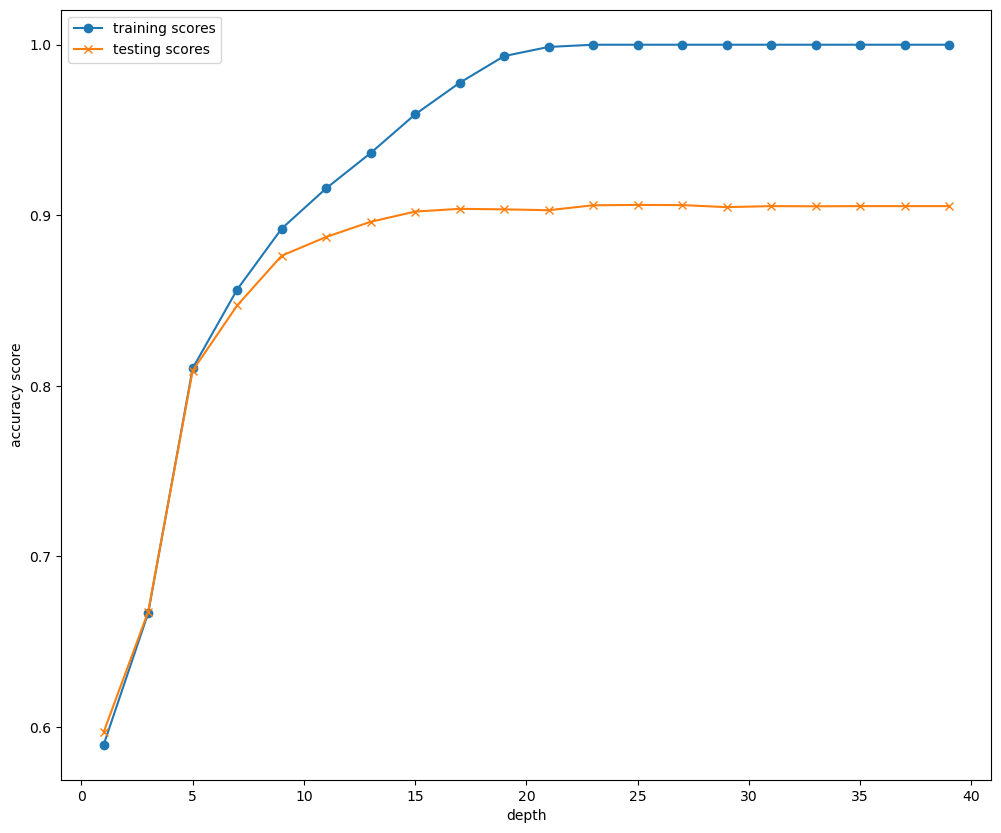

In [101]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 40, 2), scores_df['train'], marker='o', label="training scores")
plt.plot(range(1, 40, 2), scores_df['test'], marker="x", label="testing scores")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [102]:
# change criterion to entropy

# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 40, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': [], 'r2' : []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = RandomForestClassifier(n_estimators=128,max_depth=depth, random_state= 1, criterion='entropy')
    clf.fit(X_train_scaled, y_train)

    train_score = clf.score(X_train_scaled, y_train)
    test_score = clf.score(X_test_scaled, y_test)

    y_predict = clf.predict(X_test_scaled)
    r2 = round(r2_score(y_test,y_predict),5)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)
    scores['r2'].append(r2)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df

,train,test,r2
depth,,,
1,0.480133,0.495354,-0.83266
3,0.751374,0.755720,0.31340
5,0.834371,0.829853,0.47413
7,0.874138,0.868119,0.59507
9,0.908543,0.890499,0.64180
11,0.927061,0.901389,0.67797
13,0.943381,0.903986,0.69084
15,0.962664,0.905585,0.69620
17,0.985079,0.907583,0.69866


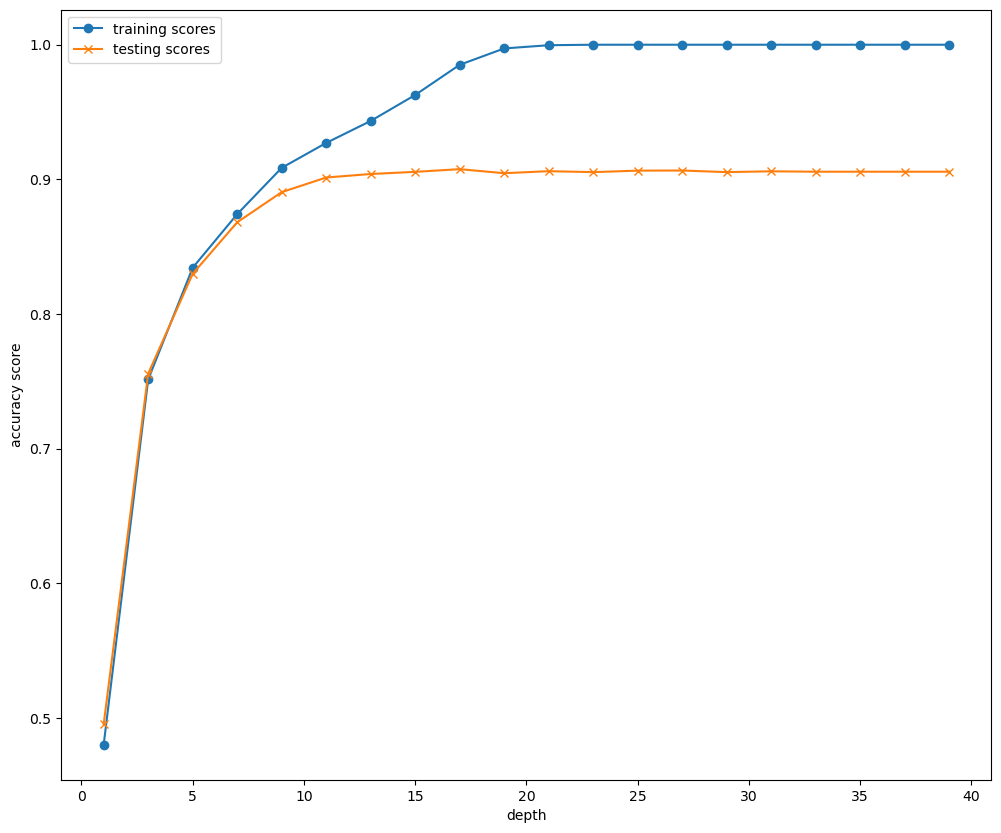

In [103]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 40, 2), scores_df['train'], marker='o', label="training scores")
plt.plot(range(1, 40, 2), scores_df['test'], marker="x", label="testing scores")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [104]:

# change criterion to log_loss

# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 40, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': [], 'r2' : []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = RandomForestClassifier(n_estimators=128,max_depth=depth, random_state= 1, criterion='log_loss',)
    clf.fit(X_train_scaled, y_train)

    train_score = clf.score(X_train_scaled, y_train)
    test_score = clf.score(X_test_scaled, y_test)

    y_predict = clf.predict(X_test_scaled)
    r2 = round(r2_score(y_test,y_predict),5)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)
    scores['r2'].append(r2)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df



,train,test,r2
depth,,,
1,0.480133,0.495354,-0.83266
3,0.751374,0.755720,0.31340
5,0.834371,0.829853,0.47413
7,0.874138,0.868119,0.59507
9,0.908543,0.890499,0.64180
11,0.927061,0.901389,0.67797
13,0.943381,0.903986,0.69084
15,0.962664,0.905585,0.69620
17,0.985079,0.907583,0.69866


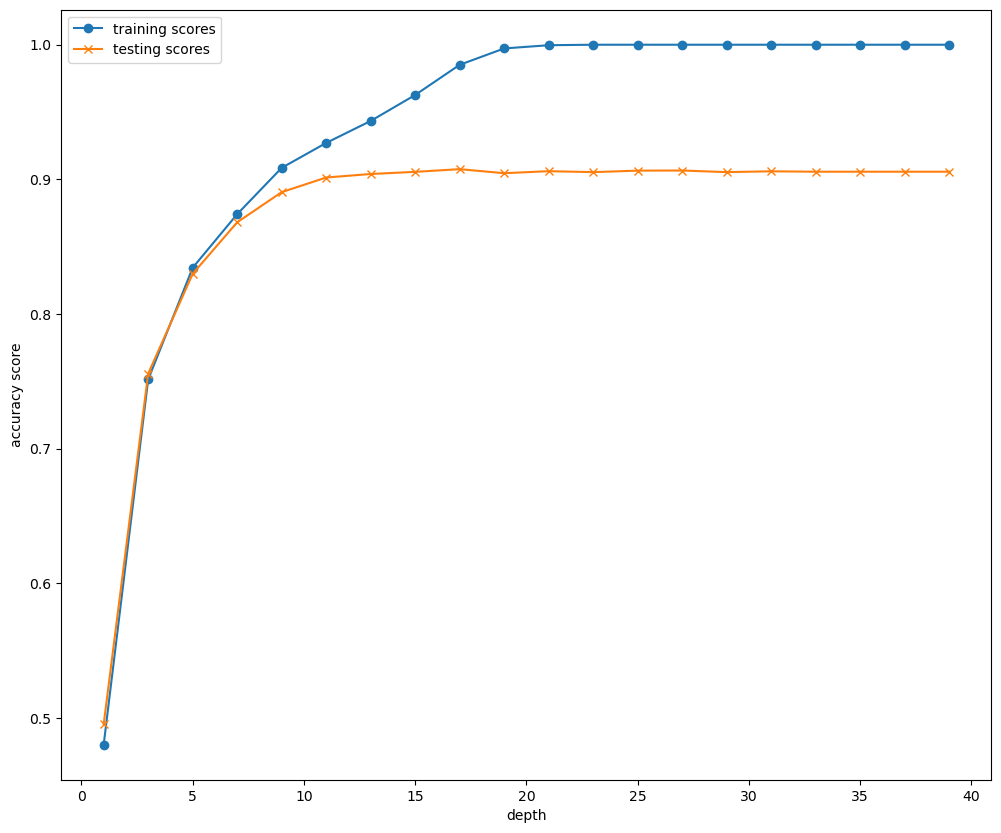

In [105]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 40, 2), scores_df['train'], marker='o', label="training scores")
plt.plot(range(1, 40, 2), scores_df['test'], marker="x", label="testing scores")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [106]:
# change criterion to gini

# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 40, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': [], 'r2' : []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = RandomForestClassifier(n_estimators=128,max_depth=depth, random_state= 1, criterion='gini')
    clf.fit(X_train_scaled, y_train)

    train_score = clf.score(X_train_scaled, y_train)
    test_score = clf.score(X_test_scaled, y_test)

    y_predict = clf.predict(X_test_scaled)
    r2 = round(r2_score(y_test,y_predict),5)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)
    scores['r2'].append(r2)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df


,train,test,r2
depth,,,
1,0.589642,0.597063,-0.66151
3,0.666778,0.667599,-0.25341
5,0.810325,0.808972,0.41091
7,0.856486,0.847138,0.48570
9,0.892190,0.876311,0.57656
11,0.915803,0.887301,0.62068
13,0.936520,0.896193,0.65612
15,0.959167,0.902188,0.67869
17,0.977685,0.903787,0.68361


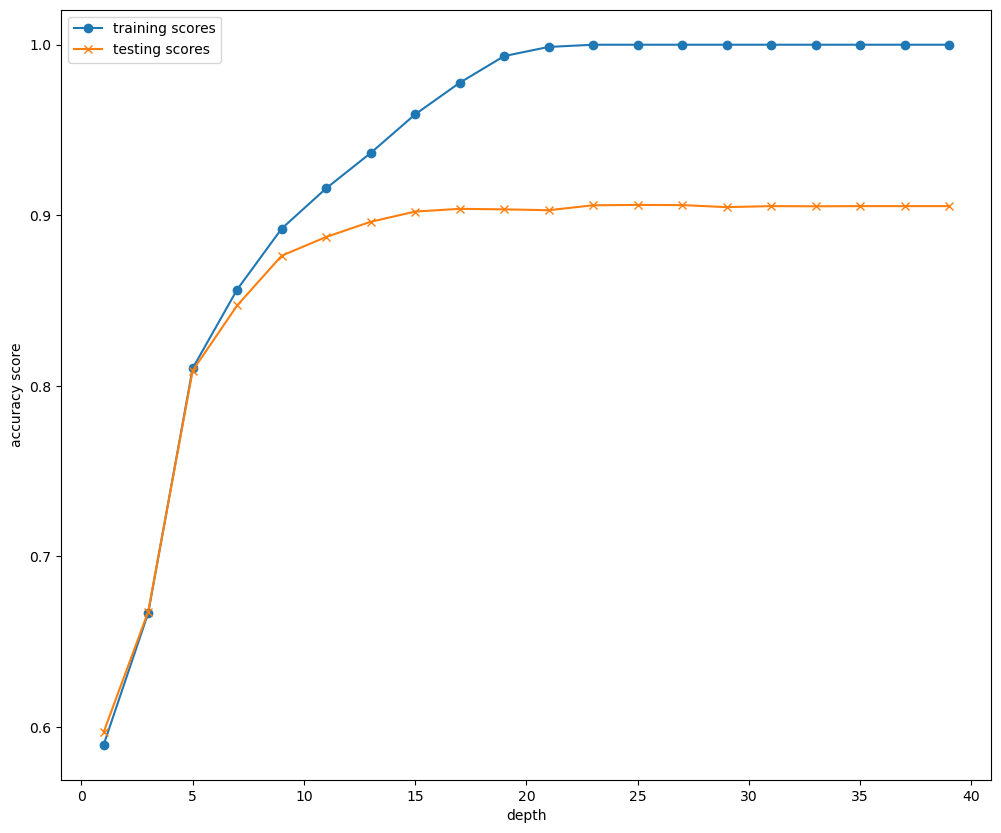

In [107]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 40, 2), scores_df['train'], marker='o', label="training scores")
plt.plot(range(1, 40, 2), scores_df['test'], marker="x", label="testing scores")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

Random Forest with 'entropy' appears to be the best amoung the different criterions

In [45]:
# gb model
#gb_model = GradientBoostingClassifier(random_state=1,n_estimators=128)
gb_model.fit(X_train_scaled, y_train)
train_acc, test_acc, r2_acc = validate_model (gb_model,X_train_scaled, y_train, X_test_scaled, y_test)
#collectResults("SVM",train_acc,test_acc, r2_acc)
print(train_acc, test_acc, r2_acc)


0.9165029142381349 0.9048856029573384 0.69345


In [39]:
# gb model
gb_model = GradientBoostingClassifier(random_state=1,n_estimators=128)
gb_model.fit(X_train_scaled, y_train)
train_acc, test_acc, r2_acc = validate_model (gb_model,X_train_scaled, y_train, X_test_scaled, y_test)
#collectResults("SVM",train_acc,test_acc, r2_acc)
print(train_acc, test_acc, r2_acc)


0.9165029142381349 0.9048856029573384 0.69345


In [40]:
# gb model
gb_model = GradientBoostingClassifier(random_state=1,n_estimators=128,max_depth=11)
gb_model.fit(X_train_scaled, y_train)
train_acc, test_acc, r2_acc = validate_model (gb_model,X_train_scaled, y_train, X_test_scaled, y_test)
#collectResults("SVM",train_acc,test_acc, r2_acc)
print(train_acc, test_acc, r2_acc)

1.0 0.9125786791887301 0.71848


In [41]:
# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 13, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': [], 'r2' : []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = GradientBoostingClassifier(random_state=1,n_estimators=128,max_depth=depth)
    clf.fit(X_train_scaled, y_train)

    train_score = clf.score(X_train_scaled, y_train)
    test_score = clf.score(X_test_scaled, y_test)

    y_predict = clf.predict(X_test_scaled)
    r2 = round(r2_score(y_test,y_predict),5)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)
    scores['r2'].append(r2)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df


,train,test,r2
depth,,,
1,0.847127,0.840244,0.52650
3,0.916503,0.904886,0.69345
5,0.932090,0.909282,0.70546
7,0.958401,0.911879,0.71920
9,0.999034,0.912279,0.71848
11,1.000000,0.912579,0.71848


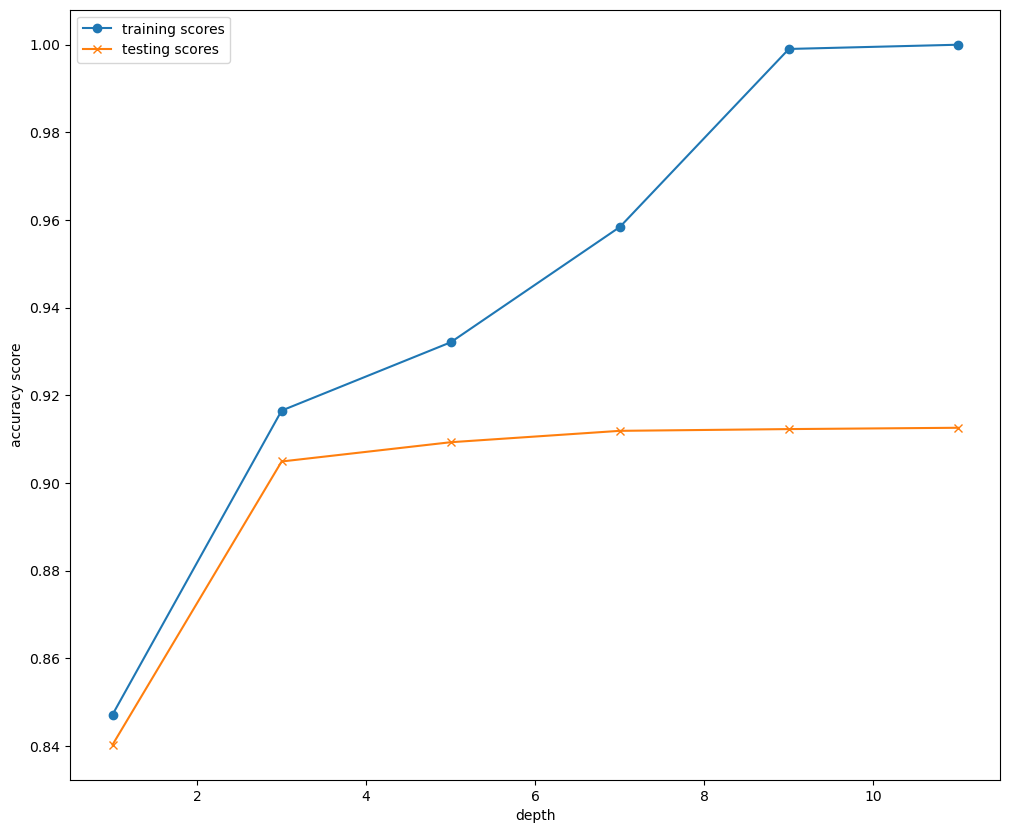

In [43]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 13, 2), scores_df['train'], marker='o', label="training scores")
plt.plot(range(1, 13, 2), scores_df['test'], marker="x", label="testing scores")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [77]:
# look at Lonnie & Mike

# encoded columns with objects to numeric values, get_dummies
df_lm_encoded = df_lm.copy()
df_lm_encoded = pd.get_dummies(df_lm_encoded,columns= obj_col,dtype='int',drop_first=True)
X_lm = df_lm_encoded
X_lm

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,GameGenre_RPG
0,57,1.5,0,2,30,10,8,0
1,49,6.0,0,5,180,20,50,1


In [79]:
df_lm_encoded

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,GameGenre_RPG
0,57,1.5,0,2,30,10,8,0
1,49,6.0,0,5,180,20,50,1


In [69]:
predicted = rf_model.predict(X_lm)
predicted

c:\Users\saund\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 8 features, but RandomForestClassifier is expecting 17 features as input.

In [80]:
X_test_scaled

array([[-0.49680109, -0.78441908, -0.50088452, ..., -0.50239271,
         2.        , -0.65493921],
       [-0.99512579,  1.63174671, -0.50088452, ...,  1.99047476,
        -0.5       , -0.65493921],
       [ 0.69917818,  1.16638518, -0.50088452, ..., -0.50239271,
        -0.5       ,  1.52685927],
       ...,
       [-0.69613097, -1.05925066, -0.50088452, ..., -0.50239271,
        -0.5       , -0.65493921],
       [ 1.69582757,  1.35944018, -0.50088452, ..., -0.50239271,
        -0.5       , -0.65493921],
       [-0.39713615, -1.35445716, -0.50088452, ..., -0.50239271,
        -0.5       ,  1.52685927]])